In [2]:
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from math import sqrt

# Current Data
The file I've been collecting data in on a raspberry pi:

In [3]:
file = '/Users/admin/Desktop/Covidiot2.csv'

In [4]:
covid_df = pd.read_csv(file, sep='\t', usecols=['datetime', 'USA', 'Canada', 'Mexico', 'Italy', 'France', 
                                              'Germany', 'Spain', 'UK', 'Japan', 'S. Korea', 'India', 
                                              'Philippines', 'Brazil', 'Venezuela', 'Peru', 'South Africa', 
                                              'Egypt', 'Nigeria', 'Ethiopia', 'Iran', 'Israel', 'Australia'])

In [5]:
covid_df['datetime'] = pd.to_datetime(covid_df['datetime'])

In [6]:
covid_df.head()

,datetime,USA,Canada,Mexico,Italy,France,Germany,Spain,UK,Japan,...,Brazil,Venezuela,Peru,South Africa,Egypt,Nigeria,Ethiopia,Iran,Israel,Australia
0,2020-04-28 19:23:07.143794,0.3124,0.1325,0.0120,0.3333,0.2542,0.1907,0.4965,0.2374,0.0108,...,0.0343,0.0012,0.0946,0.0084,0.0049,0.0006,0.0001,0.1102,0.1817,0.0264
1,2020-04-28 19:25:44.847000,0.3124,0.1325,0.0120,0.3333,0.2542,0.1907,0.4965,0.2374,0.0108,...,0.0343,0.0012,0.0946,0.0084,0.0049,0.0006,0.0001,0.1102,0.1817,0.0264
2,2020-04-29 05:15:02.500926,0.3129,0.1325,0.0130,0.3333,0.2542,0.1909,0.4965,0.2374,0.0109,...,0.0345,0.0012,0.0946,0.0084,0.0049,0.0007,0.0001,0.1102,0.1823,0.0264
3,2020-04-29 17:15:03.052925,0.3188,0.1357,0.0130,0.3367,0.2550,0.1924,0.5067,0.2434,0.0109,...,0.0368,0.0012,0.1029,0.0090,0.0051,0.0007,0.0001,0.1115,0.1823,0.0265
4,2020-04-30 05:15:03.093615,0.3216,0.1367,0.0138,0.3367,0.2550,0.1928,0.5067,0.2434,0.0110,...,0.0375,0.0012,0.1029,0.0090,0.0051,0.0008,0.0001,0.1115,0.1834,0.0265


# Linear Prediction of U.S. Covid-19 Rate:

### Date 
Instead of datetime, the dates are converted into hours from the start date of data collection (4/28/20). This format can more easily be applied to regression models. 

In [7]:
start_date = covid_df.loc[0, 'datetime']
covid_df['datetime start'] = start_date
covid_df['timedelta (hours)'] = (covid_df['datetime'] - covid_df['datetime start']).astype('timedelta64[h]')

In [8]:
covid_df.tail()

,datetime,USA,Canada,Mexico,Italy,France,Germany,Spain,UK,Japan,...,Peru,South Africa,Egypt,Nigeria,Ethiopia,Iran,Israel,Australia,datetime start,timedelta (hours)
96,2020-07-06 20:18:26.082492,0.900463,0.280678,0.199211,0.399953,0.257892,0.236399,0.538531,0.420953,0.015635,...,0.927163,0.346865,0.074483,0.013928,0.005085,0.289371,0.355252,0.032922,2020-04-28 19:23:07.143794,1656.0
97,2020-07-07 05:15:04.575527,0.904026,0.280678,0.203013,0.399953,0.257892,0.236399,0.538531,0.420953,0.015635,...,0.927163,0.346865,0.074483,0.014207,0.005085,0.289371,0.361283,0.033671,2020-04-28 19:23:07.143794,1665.0
98,2020-07-07 17:15:04.055501,0.914938,0.280678,0.203013,0.400180,0.258619,0.236746,0.539260,0.421809,0.015635,...,0.927163,0.346865,0.074483,0.014207,0.005085,0.292510,0.361283,0.033671,2020-04-28 19:23:07.143794,1677.0
99,2020-07-08 05:15:04.005969,0.920860,0.281261,0.207866,0.400180,0.258619,0.236746,0.539260,0.421809,0.015635,...,0.938006,0.363952,0.075516,0.014207,0.005085,0.292510,0.361283,0.034333,2020-04-28 19:23:07.143794,1689.0
100,2020-07-08 17:15:03.981648,0.929620,0.281825,0.207866,0.400499,0.259635,0.237028,0.540080,0.422737,0.015951,...,0.949025,0.363952,0.075516,0.014451,0.005085,0.295714,0.377955,0.034098,2020-04-28 19:23:07.143794,1701.0


### Sklearn Regression
The linear regression class learns from the existing US rate/dates

In [9]:
X_train = covid_df[['timedelta (hours)']]
Y_train = covid_df[['USA']]

regressor = LinearRegression()
regressor.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

The same x values plus an additional timedelta (of 480 hours more than the last reading datetime) are used to predict y

In [10]:
X_test = X_train.copy()
last_reading = covid_df.iloc[-1, -1]
X_test = X_test.append(pd.Series(data={'timedelta (hours)': (last_reading + 480)}, name=101))
X_test.tail()

,timedelta (hours)
97,1665.0
98,1677.0
99,1689.0
100,1701.0
101,2181.0


In [11]:
y_prediction = regressor.predict(X_test)
y_pred = pd.DataFrame(y_prediction)
y_pred.tail()

,0
97,0.841806
98,0.845624
99,0.849443
100,0.853261
101,1.006002


### Graph and RMSE

Selects 4-5 values to use as xticks on the graphs using a step/range

In [12]:
date_list = [X_test['timedelta (hours)'][i] for i in range(0, X_test.index[-1], 30)]
date_list.append(X_test.iloc[-1, 0]) # if step is uneven, adds last value
date_list

[0.0, 345.0, 717.0, 1449.0, 2181.0]

Converts the xtick values to date strings (from 4/28/20)

In [13]:
first_date = datetime.datetime(year=2020, month=5, day=28)
string_dates = []
for h in date_list:
    date = first_date + datetime.timedelta(hours=h)
    string_dates.append(date.strftime('%d %B, %Y'))

<function matplotlib.pyplot.show(*args, **kw)>

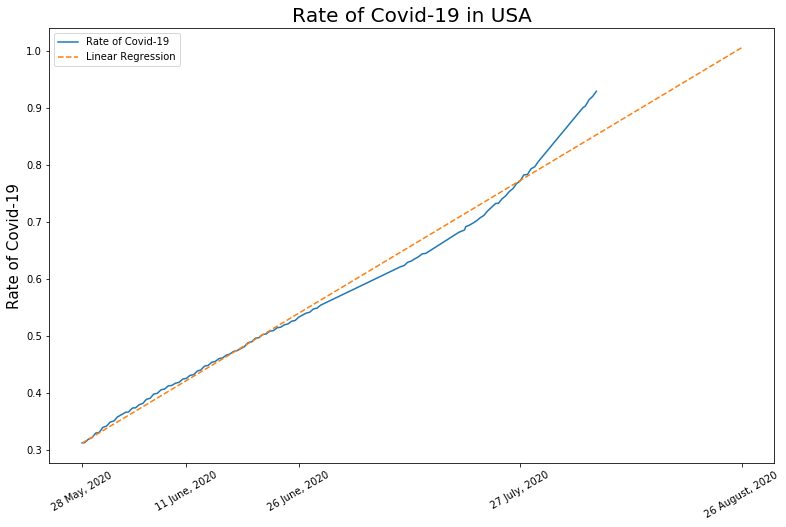

In [14]:
plt.figure(figsize=(13,8))

plt.plot(covid_df['timedelta (hours)'], covid_df['USA'], '-', X_test, y_pred, '--')
    
plt.legend(('Rate of Covid-19', 'Linear Regression'), loc='upper left')
plt.ylabel('Rate of Covid-19', fontsize=15)
plt.xticks(date_list, labels=string_dates, rotation=30)
plt.title('Rate of Covid-19 in USA', fontsize=20)

plt.show

In [15]:
# y_pred[:-1] excludes extra date used for future rate prediction
lin_RMSE = sqrt(mean_squared_error(y_true=covid_df['USA'], y_pred=y_pred[:-1])) 
lin_RMSE

0.01941307609448109

# Polynomial Prediction of U.S. Covid-19 Rate:

In [16]:
covid_df.tail()

,datetime,USA,Canada,Mexico,Italy,France,Germany,Spain,UK,Japan,...,Peru,South Africa,Egypt,Nigeria,Ethiopia,Iran,Israel,Australia,datetime start,timedelta (hours)
96,2020-07-06 20:18:26.082492,0.900463,0.280678,0.199211,0.399953,0.257892,0.236399,0.538531,0.420953,0.015635,...,0.927163,0.346865,0.074483,0.013928,0.005085,0.289371,0.355252,0.032922,2020-04-28 19:23:07.143794,1656.0
97,2020-07-07 05:15:04.575527,0.904026,0.280678,0.203013,0.399953,0.257892,0.236399,0.538531,0.420953,0.015635,...,0.927163,0.346865,0.074483,0.014207,0.005085,0.289371,0.361283,0.033671,2020-04-28 19:23:07.143794,1665.0
98,2020-07-07 17:15:04.055501,0.914938,0.280678,0.203013,0.400180,0.258619,0.236746,0.539260,0.421809,0.015635,...,0.927163,0.346865,0.074483,0.014207,0.005085,0.292510,0.361283,0.033671,2020-04-28 19:23:07.143794,1677.0
99,2020-07-08 05:15:04.005969,0.920860,0.281261,0.207866,0.400180,0.258619,0.236746,0.539260,0.421809,0.015635,...,0.938006,0.363952,0.075516,0.014207,0.005085,0.292510,0.361283,0.034333,2020-04-28 19:23:07.143794,1689.0
100,2020-07-08 17:15:03.981648,0.929620,0.281825,0.207866,0.400499,0.259635,0.237028,0.540080,0.422737,0.015951,...,0.949025,0.363952,0.075516,0.014451,0.005085,0.295714,0.377955,0.034098,2020-04-28 19:23:07.143794,1701.0


## Numpy Polyfit


20 days (480 hours) from the last date of data collection sets the limits for the projection

In [17]:
max_hour = covid_df['timedelta (hours)'].max() + 480
max_hour

2181.0

numpy.polyfit determines the best fit third order polynomial

In [18]:
curve = np.poly1d(np.polyfit(covid_df['timedelta (hours)'], covid_df['USA'], 3)) #third order polynomial
lin_line = np.linspace(0, max_hour, 200)
poly_line = curve(lin_line)

### Graph and RMSE

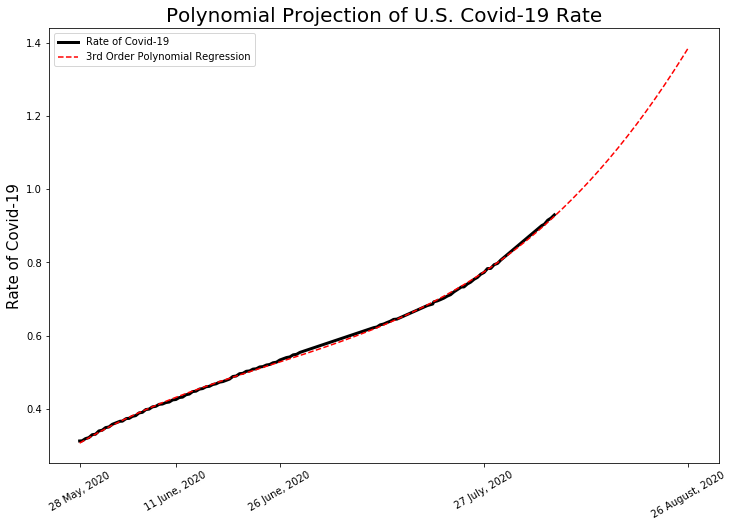

In [19]:
plt.figure(figsize=(12, 8))

plt.plot(covid_df['timedelta (hours)'], covid_df['USA'], linewidth=3, color='k')
plt.plot(lin_line, poly_line, '--', color='r')

plt.legend(('Rate of Covid-19', '3rd Order Polynomial Regression'), loc='upper left')
plt.xticks(date_list, labels=string_dates, rotation=30)
plt.ylabel('Rate of Covid-19', fontsize=15)
plt.title('Polynomial Projection of U.S. Covid-19 Rate', fontsize=20)
plt.show()

In [20]:
Poly_RMSE = sqrt(mean_squared_error(y_true=covid_df['USA'], y_pred=curve(covid_df['timedelta (hours)'])))
Poly_RMSE

0.003603410083163239

## Summary of Projections:

In [21]:
print('Linear Projection RMSE: ' + str(lin_RMSE))
print('Polynomial Projection RMSE: ' + str(Poly_RMSE))
if Poly_RMSE < lin_RMSE:
    print('The polynomial projection is a better fit')
else:
    print('The linear projection is a better fit')

Linear Projection RMSE: 0.01941307609448109
Polynomial Projection RMSE: 0.003603410083163239
The polynomial projection is a better fit
